In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hlsf.models import *
%matplotlib qt

In [2]:
config = 'H'
lamp = 'Xe'
nb_line = 100

In [3]:
## For lamp, model
lsf_data = LSF_DATA(f"../exposures/ARC-{lamp}_CLEAR_20MAS_{config}_PRM.fits", f"../text/{lamp}.txt", f"../exposures/WAVECAL_TABLE_20MAS_{config}.fits", 
                        f"../exposures/SLITLET_TABLE_20MAS_{config}.fits", normal='Normal')
lsf_data.get_line_list().keys()

dict_keys([225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238])

In [4]:
## For evaluating
lsf1 = LSF_DATA("../exposures/ARC-linspace256_CLEAR_20MAS_H_PRM.fits", "../exposures/line_catalog_linspace256.fits", "../exposures/WAVECAL_TABLE_20MAS_H.fits", 
                        "../exposures/SLITLET_TABLE_20MAS_H.fits", normal='Normal')

In [5]:
data = lsf1.get_data_line(nb_line)
waves = data['map_wave']
w_0 = data['waveline']
lsf1 == lsf_data

True

## Gaussian model, quite good

In [57]:
mod = GAUSSIAN_MODEL_2(lsf_data)
mod.write_json(f'../file/gaussian_model_2_{config}_{lamp}.json')

Destructor called


In [33]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel("wavelength")
plt.ylabel("RMS error")
lsf1.plot_line(nb_line, ax)
mod.plot(w_0, waves, ax)
plt.legend([f'Real data', 'fitted line'])
plt.title(f'RMS error {mod.error_rms(lsf1, nb_line)}')
plt.grid()
plt.show()

## Moffat
- Take times
- Overflow due to poaer of beta

In [46]:
mod_moffat_2 = MOFFAT_MODEL_2.from_json('moffat_model_2.json')

FileNotFoundError: [Errno 2] No such file or directory: 'moffat_model_2.json'

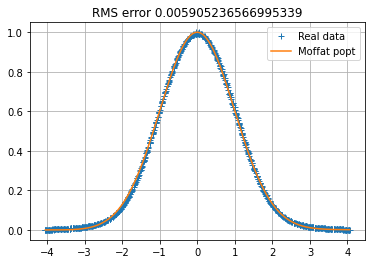

In [81]:
fig = plt.figure()
ax = plt.axes()
lsf1.plot_line(nb_line, ax)
mod_moffat_2.plot(w_0, waves, ax)
plt.grid()
plt.legend(['Real data', 'Moffat popt'])
plt.title(f'RMS error {mod_moffat_2.error_rms(lsf1, nb_line)}')
plt.show()

In [25]:
mod_moffat_2.error_rms(lsf1, nb_line)

0.005905236566995339

## Bad case for Gauss Hermite model
- Need to add bounds to each parameter

In [7]:
mod_hermite_1 = GAUSS_HERMITE_MODEL(lsf_data, deg=11)
mod_hermite_1.write_json(f'../file/{str.lower(mod_hermite_1.__class__.__name__)}_{config}_{lamp}.json')

Destructor called


In [8]:
mod_hermite_2 = GAUSS_HERMITE_MODEL_2(lsf_data, deg=11)
mod_hermite_2._coeff

array([ 3.40013601e-01, -9.14804314e-07, -2.45942833e-04,  7.79872095e-09,
       -3.00195278e-02,  1.96137458e-07,  8.25773800e-05, -1.65451557e-09,
        1.22676471e-03, -9.70443025e-09, -6.06204482e-06,  1.14797981e-10,
       -2.98051358e-05,  2.49452233e-10,  2.16199893e-07, -4.20598242e-12,
        4.47304365e-07, -3.76096836e-12, -4.27235459e-09,  8.58317411e-14,
       -3.70661485e-09,  2.97415268e-14,  4.38408028e-11, -7.67220786e-16])

In [9]:
mod_hermite_2.write_json(f'../file/{str.lower(mod_hermite_2.__class__.__name__)}_{config}_{lamp}.json')

In [10]:
fig = plt.figure()
ax = plt.axes()
mod_hermite_1.plot_error_rms(lsf1, ax)
mod_hermite_2.plot_error_rms(lsf1, ax)
plt.grid()
plt.legend(['Gauss Hermite linear', 'Gauss Hermite popt'])
plt.show()

In [11]:
fig = plt.figure()
ax = plt.axes()
lsf1.plot_line(nb_line, ax)
mod_hermite_1.plot(w_0, waves, ax)
mod_hermite_2.plot(w_0, waves, ax)
plt.grid()
plt.legend(['Real data', 'Gauss Hermite linear', 'Gauss Hermite popt'])
plt.show()

## Test case for numerous lamps

In [85]:
lamps = ["Ar", "Kr", "Ne", "Xe"]
config = 'HK'

In [ ]:
for i in range(len(lamps)):
    for j in range(i+1, len(lamps)):
        lsf_data = [LSF_DATA(f'../exposures/ARC-{lamps[i]}_CLEAR_20MAS_{config}_PRM.fits', f"../text/{lamps[i]}.txt", f"../exposures/WAVECAL_TABLE_20MAS_{config}.fits", f"../exposures/SLITLET_TABLE_20MAS_{config}.fits", file_flat=f"../exposures/FLAT-CONT2_CLEAR_20MAS_{config}_PRM.fits"), 
            LSF_DATA(f'../exposures/ARC-{lamps[j]}_CLEAR_20MAS_{config}_PRM.fits', f"../text/{lamps[j]}.txt", f"../exposures/WAVECAL_TABLE_20MAS_{config}.fits", f"../exposures/SLITLET_TABLE_20MAS_{config}.fits", file_flat=f"../exposures/FLAT-CONT2_CLEAR_20MAS_{config}_PRM.fits")]
        mod = GAUSSIAN_MODEL_2(lsf_data)
        mod.write_json(f'{str.lower(mod.__class__.__name__)}_{config}_{lamps[i]}-{lamps[j]}.json')

In [86]:
mod_gauss = GAUSSIAN_MODEL_2.from_json('gaussian_model_2_HK_Ar-Kr.json')
lsf1 = LSF_DATA("../exposures/ARC-linspace256_CLEAR_20MAS_HK_PRM.fits", "../exposures/line_catalog_linspace256.fits", "../exposures/WAVECAL_TABLE_20MAS_HK.fits", 
                        "../exposures/SLITLET_TABLE_20MAS_HK.fits", file_flat="../exposures/FLAT-CONT2_CLEAR_20MAS_HK_PRM.fits")

/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/lsf_data.py:80: RuntimeWarning: divide by zero encountered in true_divide
  self._image = hdul['CHIP'+str(self.detID)+'.DATA'].data/hdul_flat['CHIP'+str(self.detID)+'.DATA'].data
/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/lsf_data.py:80: RuntimeWarning: invalid value encountered in true_divide
  self._image = hdul['CHIP'+str(self.detID)+'.DATA'].data/hdul_flat['CHIP'+str(self.detID)+'.DATA'].data
/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/lsf_data.py:80: RuntimeWarning: divide by zero encountered in true_divide
  self._image = hdul['CHIP'+str(self.detID)+'.DATA'].data/hdul_flat['CHIP'+str(self.detID)+'.DATA'].data
/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/lsf_data.py:80: RuntimeWarning: invalid value encountered in true_divide
  self._image = hdul['CHIP'+str(self.detID)+'.DATA'].data/hdul_flat['CHIP'+str(self.detID)+'.DATA'].data
/home/ngo/.local/lib/python3.7/site-packages/hlsf/models/l

In [87]:
mod_gauss._popt

[9.425063227865992,
 -0.8463935870195247,
 -0.8371198276898448,
 2.4152391630958827,
 3.610295424929629,
 0.012775119321503874]

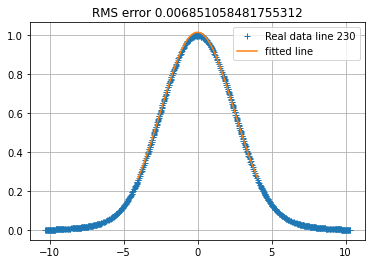

In [89]:
fig = plt.figure()
ax = plt.axes()
lsf1.plot_line(nb_line, ax)
mod_gauss.plot(w_0, waves, ax)
plt.grid()
plt.legend([f'Real data line {nb_line}', 'fitted line'])
plt.title(f'RMS error {mod_gauss.error_rms(lsf1, nb_line)}')
plt.show()